In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
sess = tf.InteractiveSession()

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [0]:
images   = tf.placeholder(tf.float32, shape=[None, 784])
labels   = tf.placeholder(tf.float32, shape=[None, 10])
image2d = tf.reshape(images, [-1, 28, 28, 1])

In [0]:

# convolution layer
with tf.variable_scope("conv1"):
  W_conv1 = weight_variable([5, 5, 1, 32])
  b_conv1 = bias_variable([32])
  h_conv1 = tf.nn.relu(conv2d(image2d, W_conv1) + b_conv1)
with tf.variable_scope("pool1"):
  h_pool1 = max_pool_2x2(h_conv1)
# convolution layer  
with tf.variable_scope("conv2"):
  W_conv2 = weight_variable([5, 5, 32, 64])
  b_conv2 = bias_variable([64])
  h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
with tf.variable_scope("pool2"):
  h_pool2 = max_pool_2x2(h_conv2)
# fc layer
with tf.variable_scope("fc1"):
  W_fc1 = weight_variable([7 * 7 * 64, 1024])
  b_fc1 = bias_variable([1024])
  h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
  h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
  keep_prob = tf.placeholder(tf.float32)
  h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
# fc layer 
with tf.variable_scope("fc2"):
  W_fc2 = weight_variable([1024, 10])
  b_fc2 = bias_variable([10])
  prediction = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
# train operation
with tf.variable_scope("train"):
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=prediction))
  train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.variable_scope("analysis"):
  correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  softmax = tf.nn.softmax(logits=prediction)
  prediction_label = tf.argmax(prediction,1)


In [7]:
# Training w/ 500 steps
sess.run(tf.global_variables_initializer())
for i in range(500):
  batch = mnist.train.next_batch(50)
  if i % 100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        images: batch[0], labels: batch[1], keep_prob: 1.0})
    print('step %d, training accuracy %g' % (i, train_accuracy))
  train_step.run(feed_dict={images: batch[0], labels: batch[1], keep_prob: 0.5})
print('test accuracy %g' % accuracy.eval(feed_dict={images: mnist.test.images, labels: mnist.test.labels, keep_prob: 1.0}))
      

step 0, training accuracy 0.1
step 100, training accuracy 0.8
step 200, training accuracy 0.86
step 300, training accuracy 0.86
step 400, training accuracy 0.92
test accuracy 0.9428


Prediction 7 with softmax prob 0.9999827 


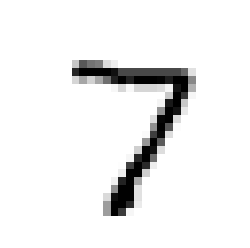

Prediction 2 with softmax prob 0.99599624 


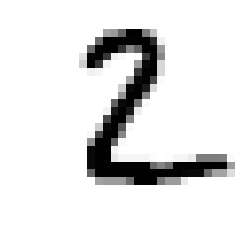

Prediction 1 with softmax prob 0.987048 


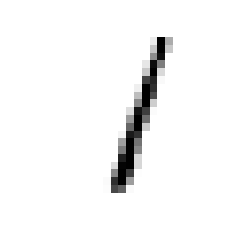

Prediction 0 with softmax prob 0.99959713 


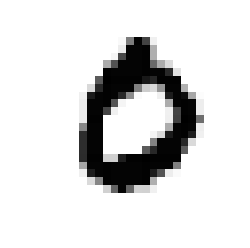

Prediction 4 with softmax prob 0.9967128 


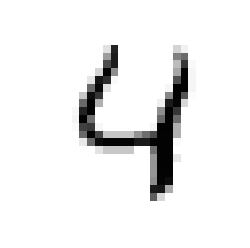

Prediction 1 with softmax prob 0.983707 


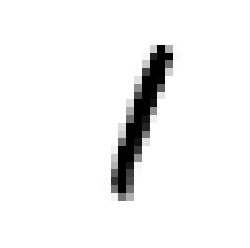

Prediction 4 with softmax prob 0.94471306 


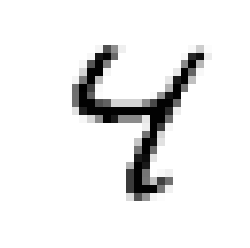

Prediction 9 with softmax prob 0.856636 


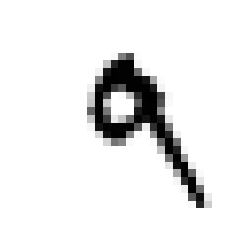

Prediction 5 with softmax prob 0.7518449 


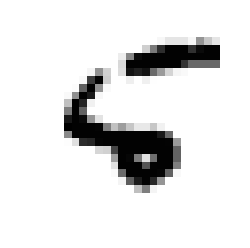

Prediction 9 with softmax prob 0.8962206 


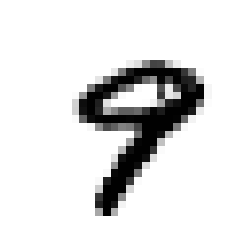

In [30]:
# Dump some output images
prob_array, pred_label, = sess.run([softmax,prediction_label],feed_dict={images: mnist.test.images,keep_prob:1.0})
for index in xrange(10):
  print 'Prediction\033[91m',pred_label[index],'\033[00mwith softmax prob\033[94m',prob_array[index][pred_label[index]],'\033[00m'
  plt.imshow(mnist.test.images[index].reshape([28,28]).astype(np.float32),interpolation='none')
  plt.axis('off')
  plt.show()

